# Mouting the Google Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## First, lets check the approach already done in the notebook:

This is an example on how to extract domain names from a sample. To do that, we can use *tld* library. To install it:

In [ ]:
!pip install tld

     |████████████████████████████████| 412 kB 7.5 MB/s 


Following function then gives domain name. It takes as an argument an URL and returns the domain name:

In [ ]:
from tld import get_tld

def get_domain(url):
    res = get_tld(url, as_object=True)
    return res.tld


Now we will have to read the data. Each sample has property 'urls' which contains a list of links to the original articles containing the quotation. We will extract domain names for these links. Then, we will save a new file that contains samples with extracted domains. The new file will be saved in local storage in Colab but you can change path_to_out variable (optionally) if you want to save it directly to the drive. To generate a new file, run this cell:

In [ ]:
import bz2
import json

path_to_file = '/content/drive/MyDrive/Quotebank/quotes-2020.json.bz2' 
path_to_out = '/content/quotes-2020-domains.json.bz2'

with bz2.open(path_to_file, 'rb') as s_file:
    with bz2.open(path_to_out, 'wb') as d_file:
        for instance in s_file:
            instance = json.loads(instance) # loading a sample
            urls = instance['urls'] # extracting list of links
            domains = []
            for url in urls:
                tld = get_domain(url)
                domains.append(tld)
            instance['domains'] = domains # updating the sample with domain name
            d_file.write((json.dumps(instance)+'\n').encode('utf-8')) # writing in the new file

This approach took us 25 mins to add an additional column to an existing data and store it into the new file.

##Let's check the second option by working with pandas chunk by chunk:

First we install the proper version of pandas to let Google collab work with chunks:

In [1]:
!pip install pandas==1.0.5

Second, we execute the function to check possibility of processing data chunk by chunk inside pandas df:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        print(chunk.columns)
path_to_file = '/content/drive/MyDrive/Quotebank/quotes-2020.json.bz2' 

In [ ]:
df_reader = pd.read_json(path_to_file, lines=True, compression='bz2', chunksize=1000000)
for chunk in df_reader:
    process_chunk(chunk)

Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 244449 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='ob

It took us only 6 mins 54 sec to process all the data which has 5'244'449 rows and 9 columns, so let's continue with this option of working with data.

##Data exploration

First, we check the presented columns and their datatypes to understand their formats:

In [ ]:
df_reader = pd.read_json(path_to_file, lines=True, compression='bz2', chunksize=10)
for chunk in df_reader:
    print(chunk.dtypes)
    break

quoteID                   object
quotation                 object
speaker                   object
qids                      object
date              datetime64[ns]
numOccurrences             int64
probas                    object
urls                      object
phase                     object
dtype: object


Next, let's check if there's some None values in speakers column. They will be considered as the missing values in terms of our project:

In [ ]:
df_reader = pd.read_json(path_to_file, lines=True, compression='bz2', chunksize=1000000)
for chunk in df_reader:
    print('Num of not null speakers out of 1 mil rows: '+ str(chunk[chunk.speaker != 'None'].shape[0]))
    process_chunk(chunk)

Num of not null speakers: 656300
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Num of not null speakers: 656222
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Num of not null speakers: 656647
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Num of not null speakers: 656528
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Num of not null speakers: 657587
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='obje

We can see that there are some Null values and we will deal with them a bit after.

Now let's see how the distibution histogram will be presented if it's done chunk by chunk (here and further we will use prints to see that data is still processing and not stuck at some point):

Currently working on new 500000...
end
Currently working on new 500000...
end
Currently working on new 500000...
end
Currently working on new 500000...
end
Currently working on new 500000...
end
Currently working on new 500000...
end
Currently working on new 500000...
end
Currently working on new 500000...
end
Currently working on new 500000...
end
Currently working on new 500000...
end
Currently working on new 500000...
end


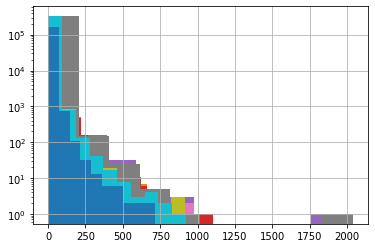

In [ ]:
df_reader = pd.read_json(path_to_file, lines=True, compression='bz2', chunksize=500000)
for chunk in df_reader:
    print('Currently working on new 500000...')
    chunk['numOccurrences'][chunk.speaker != 'None'].hist(log = True)
    print('end')

Not a good way on seeing it like that, so we have to find a better way of visualization. But still, it's great that even here, we can see the distribution graph.
The good representation will be in "Data Filtering section"



Now, as we would need to locate exact person to link him to an additional dataset, we would need the rows containing single 'qids' field, let's check how many of these we have in the dataset:

In [ ]:
df_reader = pd.read_json(path_to_file, lines=True, compression='bz2', chunksize=1000000)
for chunk in df_reader:
    print('Num of single defined speakers out of 1 mil: '+ str(chunk[chunk['qids'].str.len() == 1].shape[0]))

Num of single defined speakers out of 1 mil: 479023
Num of single defined speakers out of 1 mil: 478647
Num of single defined speakers out of 1 mil: 479164
Num of single defined speakers out of 1 mil: 478816
Num of single defined speakers out of 1 mil: 479665
Num of single defined speakers out of 1 mil: 116590


Almost half a million for each chunk, still a good amount to analyze!

We can also check the number of unique speakers:

In [ ]:
df_reader = pd.read_json(path_to_file, lines=True, compression='bz2', chunksize=1000000)
for chunk in df_reader:
    print('Num of unique speakers out of 1 mil: '+ str(chunk['speaker'].unique().shape[0]))

Num of unique speakers out of 1 mil: 129658
Num of unique speakers out of 1 mil: 129520
Num of unique speakers out of 1 mil: 129525
Num of unique speakers out of 1 mil: 129306
Num of unique speakers out of 1 mil: 129676
Num of unique speakers out of 1 mil: 62330


The problem is that these valuse from each chunk would definetely intersect. Still even somehow these are the only unique speakers, we have more that a hundred thousand persons per only few months of 2020.

##Data filtering

Now lets create a new file with only raws which have single qids for furher working with less data in project milestone 3. 

We have considered an opportunity of using json for a new file, but it doesn't have an 'Append' option for adding data, so it's not possible for us to load data chunk by chunk in there.

The solution is to use pandas to_csv option as it has mode = 'a' that allows us to load data in chunks. The only think to be considered here is to load headers only for the first chunk that has been done by setting the flag 'header = true' in the begining and then set it to 'false' after processing first chunk.

In [42]:
filtered_2020 = '/content/drive/MyDrive/quotes-2020-filtered.csv.bz2'
df_reader = pd.read_json(path_to_file, lines=True, compression='bz2', chunksize=500000)
header = True
for chunk in df_reader:
    print('processing 500000')
    chunk[chunk['qids'].str.len() == 1].to_csv(filtered_2020 , index=False, \
                                               compression = 'bz2', mode='a', header=header)
    header = False
    print('end')
  #10 mins to do that

processing 500000
end
processing 500000
end
processing 500000
end
processing 500000
end
processing 500000
end
processing 500000
end
processing 500000
end
processing 500000
end
processing 500000
end
processing 500000
end
processing 500000
end


It took 10 minutes to do that. Now let's check if we have same amount of rows that was after filtering the data in 2020 json original dataset.

In [ ]:
df_reader = pd.read_csv(filtered_2020, compression='bz2', chunksize=700000)
for chunk in df_reader:
    process_chunk(chunk)
  #2'511'905 rows procesed in 1 min 44 sec - same as in cell of just retreiving such rows from json

Processing chunk with 700000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 700000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 700000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 411905 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')


2'511'905 rows procesed in only 1 min 44 sec - same as in cell of just retreiving such rows from original data.

Now let's check if we have any missing values in 'speaker' column:

In [ ]:
df_reader = pd.read_csv(filtered_2020,compression='bz2', chunksize=700000)
for chunk in df_reader:
    print('Currently working on new 700000...')
    print('Num of null speakers out of chunk: '+ str(chunk[chunk.speaker == 'None'].shape[0]))
    print('end')

Currently working on new 700000...
Num of null speakers out of chunk: 0
end
Currently working on new 700000...
Num of null speakers out of chunk: 0
end
Currently working on new 700000...
Num of null speakers out of chunk: 0
end
Currently working on new 700000...
Num of null speakers out of chunk: 0
end


Zero as expected, that's nice!


Now we can plot the distribution mentioned in "Data exploration" section, but this time we took more interesting distribution for our idea. It's the number of quotations per person.

Currently working on new 500000...


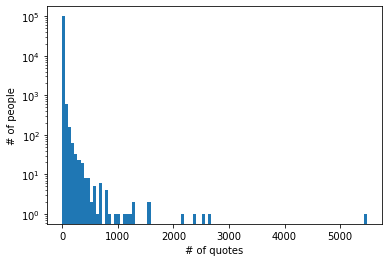

end
Currently working on new 500000...


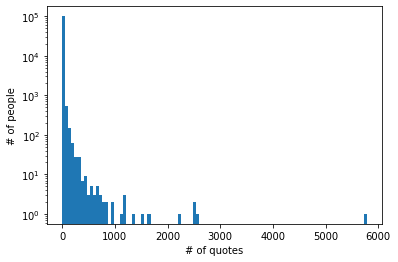

end
Currently working on new 500000...


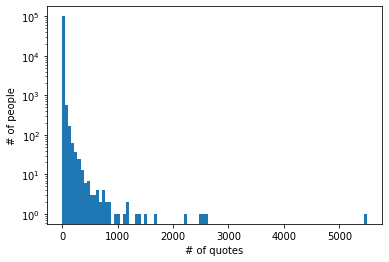

end
Currently working on new 500000...


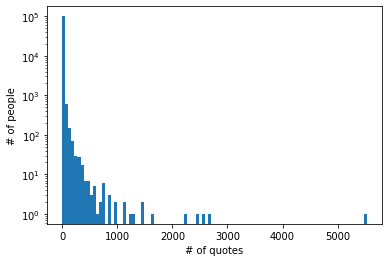

end
Currently working on new 500000...


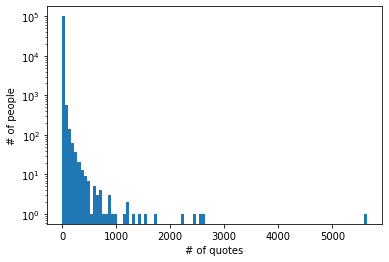

end
Currently working on new 500000...


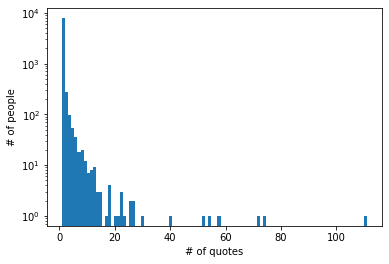

end


In [6]:
filtered_2020 = '/content/drive/MyDrive/quotes-2020-filtered.csv.bz2'
df_reader = pd.read_csv(filtered_2020, compression='bz2', chunksize=500000)
for chunk in df_reader:
    print('Currently working on new 500000...')
    plt.hist(chunk.groupby(['speaker'])['qids'].count(), log = True, bins = 100)
    plt.xlabel('# of quotes')
    plt.ylabel('# of people')
    plt.show()
    print('end')
    #1 min 44 sec to build all graphs


We can even load this data into the memory to check if everything is fine with it:

In [48]:
df = pd.read_csv(filtered_2020, compression='bz2')
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2020-01-16-000088,[ Department of Homeland Security ] was livid ...,Sue Myrick,['Q367796'],2020-01-16 12:00:13,1,"[['Sue Myrick', '0.8867'], ['None', '0.0992'],...",['http://thehill.com/opinion/international/478...,E
1,2020-01-24-000168,[ I met them ] when they just turned 4 and 7. ...,Meghan King Edmonds,['Q20684375'],2020-01-24 20:37:09,4,"[['Meghan King Edmonds', '0.5446'], ['None', '...",['https://people.com/parents/meghan-king-edmon...,E
2,2020-01-17-000357,[ The delay ] will have an impact [ on Slough ...,Dexter Smith,['Q5268447'],2020-01-17 13:03:00,1,"[['Dexter Smith', '0.924'], ['None', '0.076']]",['http://www.sloughexpress.co.uk/gallery/sloug...,E
3,2020-04-02-000239,[ The scheme ] treats addiction as an illness ...,Barry Coppinger,['Q4864119'],2020-04-02 14:18:20,1,"[['Barry Coppinger', '0.9017'], ['None', '0.09...",['http://www.theweek.co.uk/106479/why-police-a...,E
4,2020-03-19-000276,[ These ] actions will allow households who ha...,Ben Carson,['Q816459'],2020-03-19 19:14:00,1,"[['Ben Carson', '0.9227'], ['None', '0.0773']]",['https://mortgageorb.com/hud-fha-suspend-fore...,E


In [49]:
#same as before
df.shape[0]

2511905

Text(0, 0.5, '# of people')

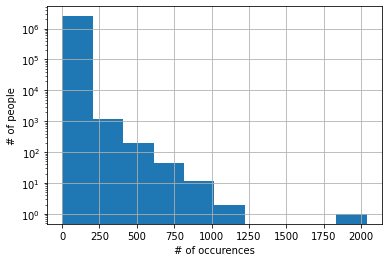

In [50]:
#check distributions
f['numOccurrences'].hist(log = True)
plt.xlabel('# of occurences')
plt.ylabel('# of people')

Text(0, 0.5, '# of people')

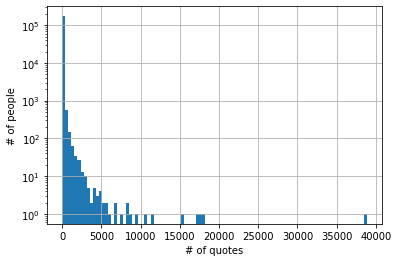

In [32]:
df.groupby(['speaker'])['qids'].count().hist(log=True, bins = 100)
plt.xlabel('# of quotes')
plt.ylabel('# of people')

In [ ]:
df.memory_usage(index=True).sum()/1000000
#num of megabytes used by a dataframe

180.857288

Now let's check if we can process like this(filter into csv) bigger amount of data, presented in the 2019 quotes dataset containing full-year data:

In [ ]:
filtered_2019 = '/content/drive/MyDrive/quotes-2019-filtered.csv.bz2'
df_reader = pd.read_json('/content/drive/MyDrive/Quotebank/quotes-2019.json.bz2', lines=True, compression='bz2', chunksize=500000)
header = True
for chunk in df_reader:
    print('processing 500000')
    chunk[chunk['qids'].str.len() == 1].to_csv(filtered_2019, index=False, \
                                               compression = 'bz2', mode='a', header=header)
    header = False
    print('end')
    #22 mil rows processed in 42 mins

Well, it took more time, but still, we did it.

And we can see that it's processing much faster now:

In [ ]:
df_reader = pd.read_csv('/content/quotes-2019-filtered.csv.bz2', compression='bz2', chunksize=700000)
for chunk in df_reader:
    process_chunk(chunk)

Processing chunk with 700000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 700000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 700000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 700000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 700000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 700000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object'

Took only 7 mins to process all of filtered data.

Now let's filter the rest quotes data from 2015 to 2018:

In [ ]:
filtered_2018 = '/content/drive/MyDrive/quotes-2018-filtered.csv.bz2'
df_reader = pd.read_json('/content/drive/MyDrive/Quotebank/quotes-2018.json.bz2', lines=True, compression='bz2', chunksize=500000)
header = True
for chunk in df_reader:
    print('processing 500000')
    chunk[chunk['qids'].str.len() == 1].to_csv(filtered_2018, index=False, \
                                               compression = 'bz2', mode='a', header=header)
    header = False
    print('end')
   # 1 hr 19 27.5 mil

In [ ]:
filtered_2017 = '/content/drive/MyDrive/quotes-2017-filtered.csv.bz2'
df_reader = pd.read_json('/content/drive/MyDrive/Quotebank/quotes-2017.json.bz2', lines=True, compression='bz2', chunksize=500000)
header = True
for chunk in df_reader:
    print('processing 500000')
    chunk[chunk['qids'].str.len() == 1].to_csv(filtered_2017, index=False, \
                                               compression = 'bz2', mode='a', header=header)
    header = False
    print('end')
    #1 hr 18 mins 27 mil

In [ ]:
filtered_2016 = '/content/drive/MyDrive/quotes-2016-filtered.csv.bz2'
df_reader = pd.read_json('/content/drive/MyDrive/Quotebank/quotes-2016.json.bz2', lines=True, compression='bz2', chunksize=500000)
header = True
for chunk in df_reader:
    print('processing 500000')
    chunk[chunk['qids'].str.len() == 1].to_csv(filtered_2016, index=False, \
                                               compression = 'bz2', mode='a', header=header)
    header = False
    print('end')
    #14 mil processed in 31 mins

In [ ]:
filtered_2015 = '/content/drive/MyDrive/quotes-2015-filtered.csv.bz2'
df_reader = pd.read_json('/content/drive/MyDrive/Quotebank/quotes-2015.json.bz2', lines=True, compression='bz2', chunksize=500000)
header = True
for chunk in df_reader:
    print('processing 500000')
    chunk[chunk['qids'].str.len() == 1].to_csv(filtered_2015, index=False, \
                                               compression = 'bz2', mode='a', header=header)
    header = False
    print('end')
# 21 mil processed in 46 mins.

##Stay tuned, the results for project milestone 3 are coming on your screens December 17th...